This notebook contains examples of machine learning with Python.

Date Created: 4 Mar 2018
<br>
Last Modified: 7 Mar 2018 
<br>
Humans Responsible: The Prickly Pythons

# 0. Resources

Books:
- http://www.deeplearningbook.org
- https://github.com/rasbt/python-machine-learning-book
- https://github.com/ageron/handson-ml
- https://seat.massey.ac.nz/personal/s.r.marsland/MLBook.html

Online courses:
- https://developers.google.com/machine-learning/crash-course/

Podcasts:
- https://www.thenakedscientists.com/podcasts/naked-scientists-podcast/countdown-artificial-intelligence

Organizations:
- https://www.cser.ac.uk

See this GitHub repository for a massive list of resources on machine learning for biology:
<br>
https://github.com/hussius/deeplearning-biology

Paper on bioArxiv - Opportunities and Obstacles for Deep Learning in Biology and Medicine:
<br>
https://www.biorxiv.org/content/early/2017/05/28/142760

Article on deep learning for science:
<br>
https://www.oreilly.com/ideas/a-look-at-deep-learning-for-science

Python libraries for ML:
- Scikit-Learn
- TensorFlow
- Theano
- pytorch


In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

# 1. Definition: What is Machine Learning?
Giving computers the ability to learn without being explicitly programmed.
<br>
Learning - the computer's performance on a task, as measured by some metric, improves with experience.

NERSC has a good picture showing the branches of ML:
<br>
http://www.nersc.gov/users/data-analytics/data-analytics-2/deep-learning

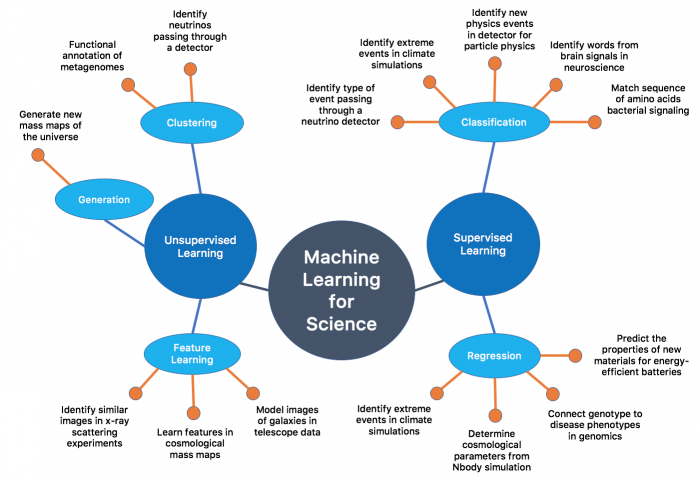

In [65]:
Image(filename='images/ML_NERSC.png', width=700)

# 2. Neural Networks
Here is how you could do classification with a single neruon.

Adapted from: https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch02/ch02.ipynb

In [1]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta    : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Number of passes over the training dataset.

    Attributes
    -----------
    w_      : 1D-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data. This is where the magic happens. 
        The weights are updated according to the errors from the ground truth.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0) # error here is the number of weights that changed
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Read in the data
There exists two types of irises - Setosa and Versicolor. We want to differentiate them via their petal length and sepal length.

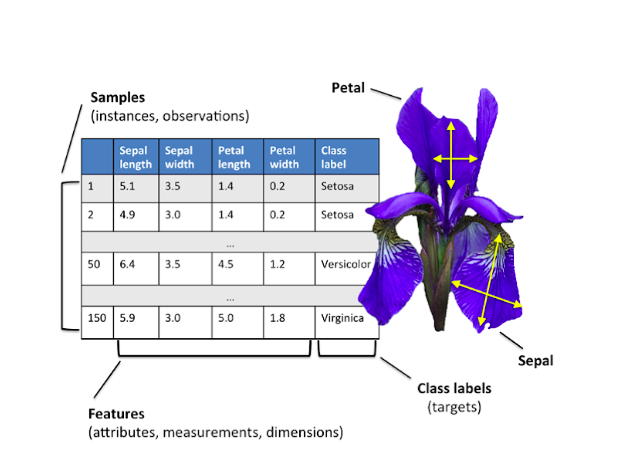

In [69]:
Image(filename='images/iris_data_layout.png', width=500)

In [66]:
import pandas as pd

# This is the training set
df = pd.read_csv('data/iris/iris.txt', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


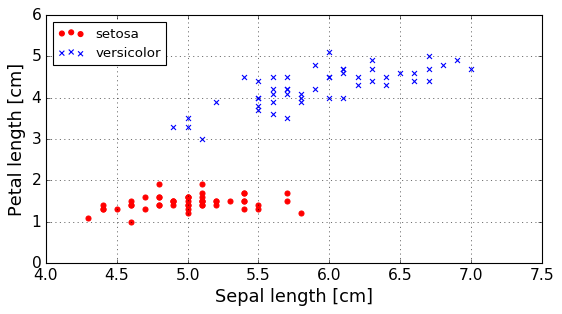

In [48]:
# Select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# Plot data
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(111)
ax1.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
ax1.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

ax1.set_xlabel('Sepal length [cm]')
ax1.set_ylabel('Petal length [cm]')
ax1.grid()
ax1.legend(loc='upper left')

plt.show()

## Training the perceptron model

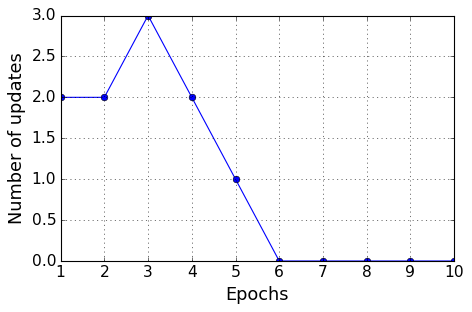

In [45]:
# Initialize an instance of perceptron
ppn = Perceptron(eta=0.1, n_iter=10)

# Do the training
ppn.fit(X, y)

# Plot the progress of the training
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.grid()
plt.tight_layout()

plt.show()

## Visualize results

In [46]:
from matplotlib.colors import ListedColormap

# Function to visualize the classification regions learnt from the data.
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

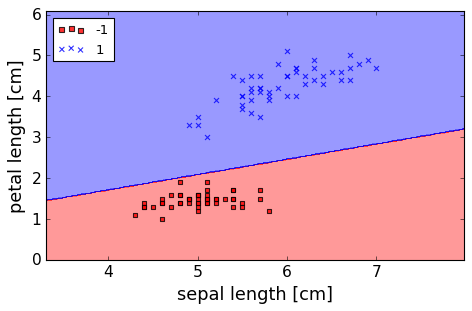

In [35]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# 3. Examples of machine learning

## 3.1 Mimicing Van Gogh
T. Putri, R. Mukundan, K. Neshatian, "Artistic Style Characterization and Brush Stroke Modelling for Non-Photorealistic Rendering", IVCNZ Conference Proceedings, 2017.

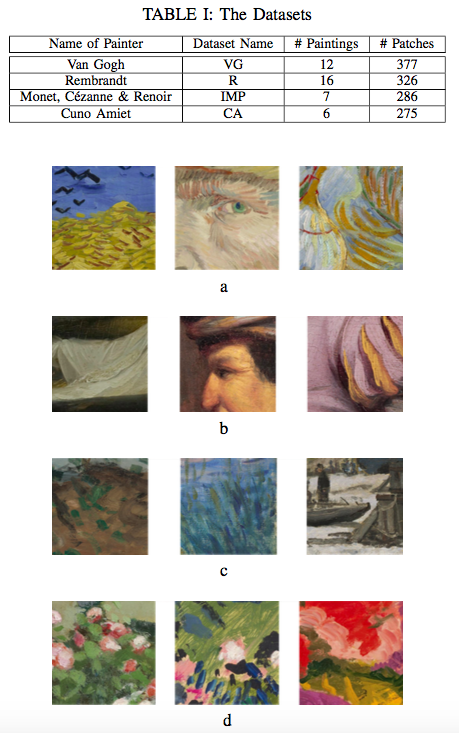

In [40]:
Image(filename='images/example1.png', width=450)

## 3.2 Colorization
R. Zhang, P. Isola, A. A. Efros, "Colorful Image Colorization" Arxiv 2016
<br>
https://arxiv.org/abs/1603.08511

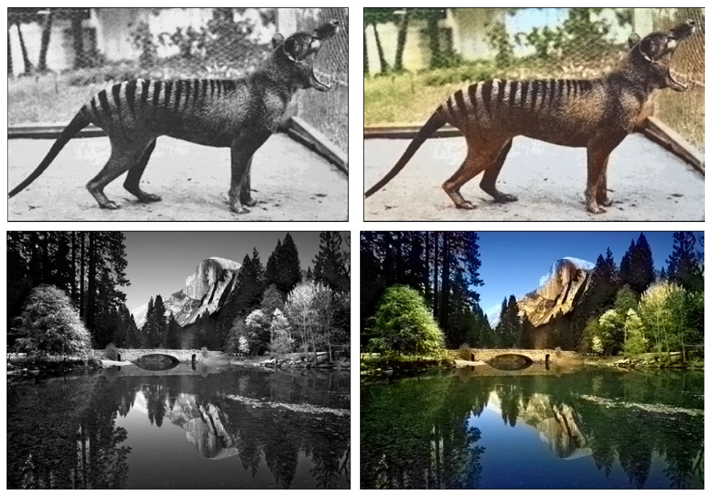

In [51]:
Image(filename='images/example2.png', width=500)

## 3.3 Multiple scattering
https://www.nature.com/articles/523416a

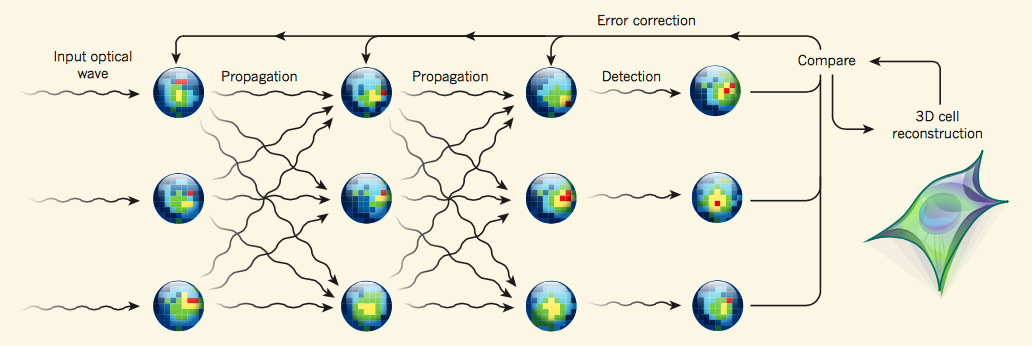

In [57]:
Image(filename='images/example3.png', width=750)

## 3.4 Go
Alpha Go https://www.nature.com/articles/nature16961
<br>
Alpha Go Zero https://www.nature.com/articles/nature24270

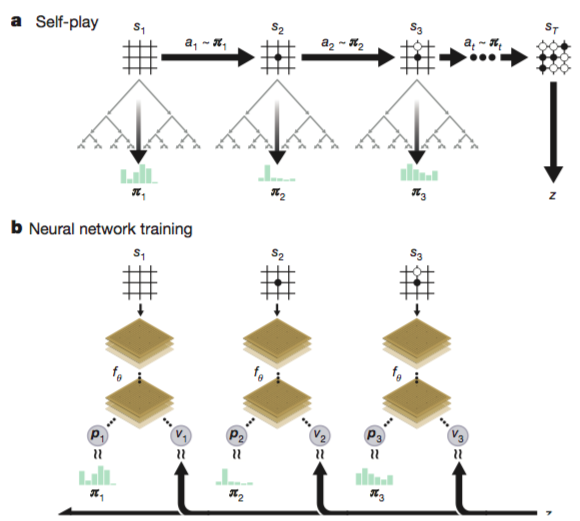

In [60]:
Image(filename='images/example4.png', width=500)

And many others: Self driving vehicles, recommendation systems, pattern spotting in biology, medicine, astronomy.. etc. anywhere with big data.